<a href="https://colab.research.google.com/github/ReginaFierro2000/Visualizacion/blob/main/Ejercicio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import datetime
import re

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import wordcloud

# Ejercicio 5
Para este ejercicio, generarás una Nube de Palabras, pero ahora con tuits de Bill Gates.

In [83]:
tweets  = pd.read_csv("https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/datos_tweets_@BillGates.csv")
tweets.head()

,screen_name,user_id,created_at,status_id,text,retweet_count,favorite_count,is_quote_status,quote_status_id,is_retweet,...,hashtags,coordinates,place_id,place_type,place_name,place_full_name,country_code,country,bounding_box_coordinates,bounding_box_type
0,BillGates,50393960,2017-11-09T20:09:06Z,9.287161e+17,Tanzania hopes to eliminate one of the world’s...,608,2483,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BillGates,50393960,2017-11-08T16:39:30Z,9.283010e+17,"By investing in R&amp;D, I know we can discove...",1090,5321,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BillGates,50393960,2017-11-07T17:43:05Z,9.279546e+17,This unusual tool for fighting disease turns o...,830,4653,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BillGates,50393960,2017-11-02T17:42:19Z,9.261424e+17,My first trip to Africa with Melinda was the c...,1421,10944,False,NaN,False,...,MyGivingStory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BillGates,50393960,2017-10-30T04:01:05Z,9.248486e+17,"“The death that didn’t happen is not visible.""...",918,3508,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se evaluará que:

1. Generes la limpieza del texto (puedes copiar los pasos que hicimos en la clase). (1 punto)
2. Utilices algún método extra para eliminar Stopwords. (1 punto)
Ideas (puedes usar una o varias):

    a) Eliminar manualmente palabras que no te digan mucho. Por ejemplo, "http".
    b) Usar STOPWORDS de la librería wordcloud.
    c) Usar stopwords de la librería nltk.

3. Generes tu gráfico de Nube de Palabras. (2 puntos)
4. Modifiques algun(os) parámetros para modificar tu Nube de Palabras (1 punto).

In [34]:
tweets.size

73045

1. Generes la limpieza del texto (puedes copiar los pasos que hicimos en la clase).

In [84]:
tweets = tweets[["status_id", "created_at", "text"]]
tweets.columns = ["ID", "Fecha", "Texto"]
tweets.head()

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09T20:09:06Z,Tanzania hopes to eliminate one of the world’s...
1,9.283010e+17,2017-11-08T16:39:30Z,"By investing in R&amp;D, I know we can discove..."
2,9.279546e+17,2017-11-07T17:43:05Z,This unusual tool for fighting disease turns o...
3,9.261424e+17,2017-11-02T17:42:19Z,My first trip to Africa with Melinda was the c...
4,9.248486e+17,2017-10-30T04:01:05Z,"“The death that didn’t happen is not visible.""..."


2. Utilices algún método extra para eliminar Stopwords. (1 punto)
Ideas (puedes usar una o varias):

    a) Eliminar manualmente palabras que no te digan mucho. Por ejemplo, "http".

In [85]:
#https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/
#tweets["Texto"] = tweets["Texto"].str.lower().str.split()
tweets["Texto"] = tweets["Texto"].replace({'http'}, regex=True)
tweets

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09T20:09:06Z,Tanzania hopes to eliminate one of the world’s...
1,9.283010e+17,2017-11-08T16:39:30Z,"By investing in R&amp;D, I know we can discove..."
2,9.279546e+17,2017-11-07T17:43:05Z,This unusual tool for fighting disease turns o...
3,9.261424e+17,2017-11-02T17:42:19Z,My first trip to Africa with Melinda was the c...
4,9.248486e+17,2017-10-30T04:01:05Z,"“The death that didn’t happen is not visible.""..."
...,...,...,...
2082,1.267828e+17,2011-10-19T22:12:21Z,"Malaria eradication is an ambitious, long-term..."
2083,1.217460e+17,2011-10-06T00:38:09Z,For those of us lucky enough to get to work wi...
2084,1.217459e+17,2011-10-06T00:37:29Z,Melinda and I extend our sincere condolences t...
2085,1.213001e+17,2011-10-04T19:06:05Z,"The crisis in Somalia has claimed 30,000 child..."


b) Usar STOPWORDS de la librería wordcloud. 

In [86]:
#import wordcloud #will use for the word cloud plot
#from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
tweets.isnull().sum().sort_values(ascending = False)
text = tweets.Texto[0]

#wordcloud = WordCloud().generate(tweets)


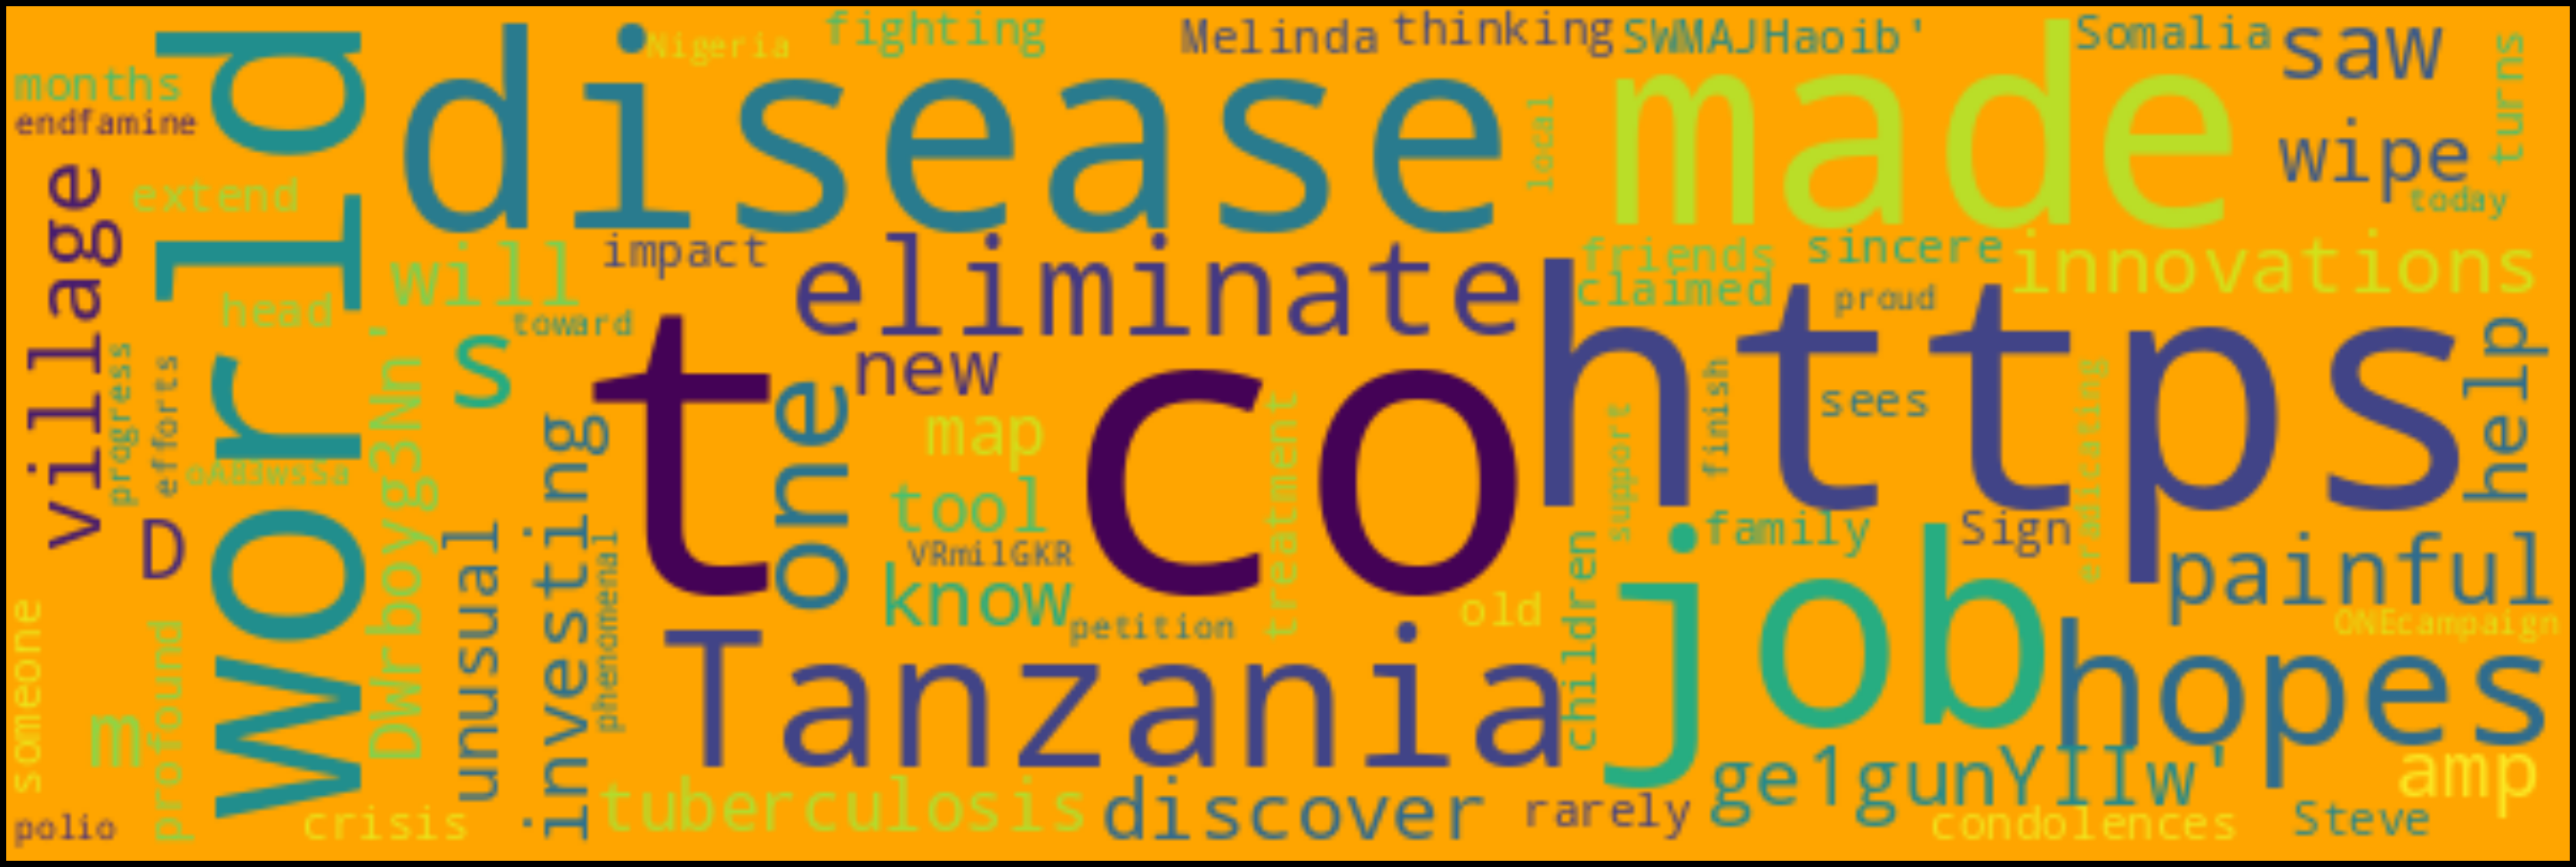

In [87]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = tweets.Texto.values
wordcloud = WordCloud(
    width = 600,
    height = 200,
    background_color = 'orange',
    stopwords = STOPWORDS).generate(str(text)) 
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

c) Usar stopwords de la librería nltk.

In [88]:
from nltk.corpus import stopwords
#tweets['tokenized'] = tweets.apply(lambda x: (x['Texto']), axis=1)
#tweets[['tokenized']].head()

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
tweets['Texto'] = tweets['Texto'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [93]:
# Remove stopwords
#tweets['Texto'] = tweets['Texto'].apply(lambda x: [item for item in x if item not in stopwords])
#tweets.head()

In [94]:
# Remove stopwords
tweets['Texto'] = tweets['Texto'].apply(lambda x: [token for token in x if token not in stopwords])
tweets.head()

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09T20:09:06Z,"[T, n, z, n, , h, p, e, , e, l, n, e, , n, ..."
1,9.283010e+17,2017-11-08T16:39:30Z,"[B, , n, v, e, n, g, , R, &, p, ;, D, ,, , ..."
2,9.279546e+17,2017-11-07T17:43:05Z,"[T, h, , u, n, u, u, l, , l, , f, g, h, n, ..."
3,9.261424e+17,2017-11-02T17:42:19Z,"[M, , f, r, , r, p, , A, f, r, c, , M, e, ..."
4,9.248486e+17,2017-10-30T04:01:05Z,"[“, T, h, e, , e, h, , n, ’, , h, p, p, e, ..."


3. Generes tu gráfico de Nube de Palabras. 

In [95]:
tweets_tidy = tweets.explode(column='Texto')
tweets_tidy

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09T20:09:06Z,T
0,9.287161e+17,2017-11-09T20:09:06Z,n
0,9.287161e+17,2017-11-09T20:09:06Z,z
0,9.287161e+17,2017-11-09T20:09:06Z,n
0,9.287161e+17,2017-11-09T20:09:06Z,
...,...,...,...
2086,1.195196e+17,2011-09-29T21:11:15Z,A
2086,1.195196e+17,2011-09-29T21:11:15Z,8
2086,1.195196e+17,2011-09-29T21:11:15Z,3
2086,1.195196e+17,2011-09-29T21:11:15Z,w


In [96]:
tweets_tidy.Texto.nunique()

89

In [97]:
# Primero, unimos tooodos los strings
textos = " ".join(cat for cat in tweets_tidy.Texto)
textos

'T n z n   h p e   e l n e   n e   w r l ’   p n f u l   e e   2 0 2 0 .   F r   I   w   v l l g e ,   I ’ …   h p : / / . c / g e 1 g u n Y I I w B   n v e n g   R & p ; D ,   I   k n w   c v e r   n e w   n n v n   h e l p   w p e   u b e r c u l   p : …   h p : / / . c / D W r b g 3 N n T h   u n u u l   l   f g h n g   e e   u r n   l   h n k n g   r e e n   h e .   h p : / / . c / S W M A J H b M   f r   r p   A f r c   M e l n   c l   b e g n   # M G v n g S r .   W h \'   u r : …   h p : / / . c / G U h 6 0 “ T h e   e h   n ’   h p p e n   v b l e . "   A   f c n n g   c n v e r n   @ A u l _ G w n e   @ G l w e l l .   h p : / / . c / l L p r B f c 0 u S r e   l k e   r e n   M e l n   I   r e   f u n n .   h p : / / . c / 0 N 5 7 Z f R k . @ J h n C e n   p l   e x p e r ?   I \'   n e   u p e r r ’   n   u r p r n g   l e n :   h p : / / . c / P z 5 U O k 7 h …   h p : / / . c / g v V R B 0 9 9 7 r I   p r v l e g e   p e k n g   @ G r e C S c h l   c n n u e   r e   n e q u

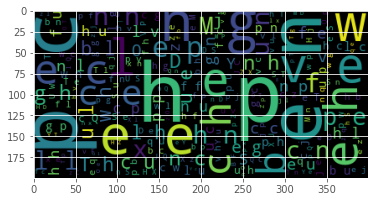

In [100]:
word_cloud = wordcloud.WordCloud().generate(textos)

plt.imshow(word_cloud)
plt.show()

4. Modifiques algun(os) parámetros para modificar tu Nube de Palabras 

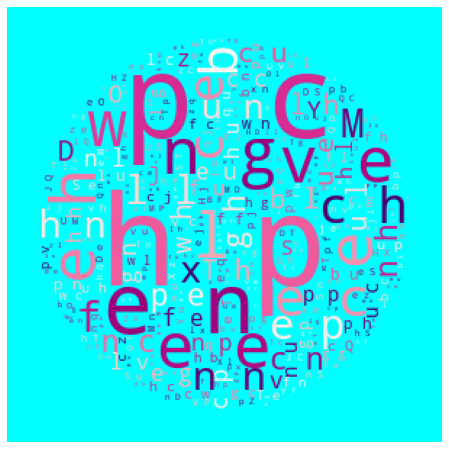

In [108]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

word_cloud = wordcloud.WordCloud(background_color="cyan", colormap="RdPu", repeat=True, mask=mask).generate(textos)

plt.figure(figsize=[15,8])
plt.imshow(word_cloud)

# plt.axis("off") quita los ejes; en este caso, sólo estorban.
plt.axis("off")
plt.show()